**Proyecto Final — Data Science I: Fundamentos para la ciencia de datos**

Franco Ruiz

Análisis de Delitos en la Ciudad de Buenos Aires (2023)

**Abstract**

El presente proyecto se centra en el análisis de un conjunto de datos que contiene registros de delitos ocurridos en la Ciudad de Buenos Aires durante el año 2023. El dataset seleccionado es altamente relevante para el perfil de análisis de datos geoespaciales, ya que incluye información detallada sobre la ubicación geográfica de los hechos, su clasificación por tipo de delito, modalidad de comisión, fecha y horario, entre otras variables.

Este proyecto resulta particularmente afín a mi perfil académico y profesional: actualmente me encuentro cursando un Máster en Teledetección y Sistemas de Información Geográfica (SIG), además de contar con experiencia en el procesamiento de datos geoespaciales y su integración con herramientas de análisis de datos. Desde mi perspectiva, la incorporación de variables espaciales en el análisis de fenómenos urbanos, como la delincuencia, permite desarrollar soluciones aplicadas de alto impacto, tanto para la toma de decisiones públicas como privadas.

La base de datos, que posee aproximadamente 157.000 registros y más de 15 variables, permite no solo la exploración estadística tradicional, sino también el desarrollo de visualizaciones avanzadas, como dashboards interactivos, mapas de calor, y análisis temporales. La disponibilidad de datos espaciales habilita la construcción de mapas que identifiquen patrones de concentración delictiva por barrios o zonas específicas, abriendo la puerta a insights de valor para organismos de seguridad, aseguradoras y organizaciones urbanas.

Dentro del enfoque analítico propuesto, se buscará establecer tendencias sobre los horarios, días de la semana y barrios donde ocurren mayores incidencias delictivas. Además, se plantearán hipótesis sobre la modalidad de los delitos en función de la ubicación geográfica y del momento temporal en el que se producen.

El objetivo final es no solo describir el fenómeno delictivo de manera precisa, sino también sentar bases para posibles modelos predictivos que permitan anticipar situaciones de riesgo en la Ciudad de Buenos Aires a partir de patrones históricos.

**Características generales del dataset seleccionado**


*   Nombre: Delitos registrados en Ciudad Autónoma de Buenos Aires en 2023
*   Cantidad de columnas: 15
*   Cantidad de registros: Más de 150 mil
*   Formato: xlsx
*   Fuente: https://data.buenosaires.gob.ar/







**Preguntas de interés para consultar en el dataset**

*   ¿En dónde se concentraron la mayor cantidad de délitos?
*   ¿En qué momento del día?
*   ¿Qué tipos de délitos son los más frecuentes?
*   ¿Se pueden identificar patrones en cuánto a la dimensión temporal?
*   ¿Cuáles son los barrios más seguros? ¿Cuáles los más inseguros?








**Primera observación a los datos**

In [40]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cargar el archivo
ruta = '/content/drive/MyDrive/Data Science I: Fundamentos para la ciencia de datos/delitos_2023.xlsx'
df = pd.read_excel(ruta)

# Ver primeras filas
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2023,enero,LUN,2023-01-02,19,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,-58445747,-34559570,1
1,2,2023,enero,MIE,2023-01-11,11,Vialidad,Muertes por siniestros viales,NO,NO,VILLA LUGANO,8,-58476557,-34673096,1
2,3,2023,enero,VIE,2023-01-13,4,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,-58485670,-34544011,1
3,4,2023,enero,VIE,2023-01-13,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58451874,-34636364,1
4,5,2023,enero,VIE,2023-01-13,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58451874,-34636364,1


<ipython-input-41-b89f3c8bca21>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delitos_por_mes.index, y=delitos_por_mes.values, palette="viridis")


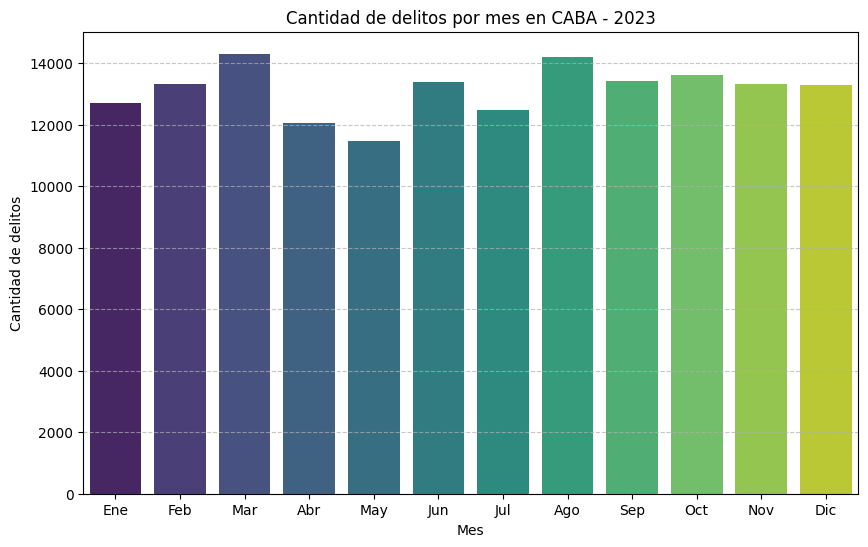

In [41]:
# Agrupamos directamente por la columna "mes" y contamos la cantidad de delitos
delitos_por_mes = df['mes'].value_counts().sort_index()

# Graficamos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=delitos_por_mes.index, y=delitos_por_mes.values, palette="viridis")

plt.title('Cantidad de delitos por mes en CABA - 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad de delitos')
plt.xticks(ticks=range(0,12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [42]:
# Creamos un DataFrame resumen
tabla_delitos_mes = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
            'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    'Cantidad de delitos': delitos_por_mes.values
})

# Mostramos la tabla
tabla_delitos_mes


,Mes,Cantidad de delitos
0,Enero,12690
1,Febrero,13312
2,Marzo,14301
3,Abril,12037
4,Mayo,11475
5,Junio,13383
6,Julio,12469
7,Agosto,14180
8,Septiembre,13425
9,Octubre,13598


<ipython-input-43-6f6282479207>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delitos_por_tipo.values, y=delitos_por_tipo.index, palette="magma")


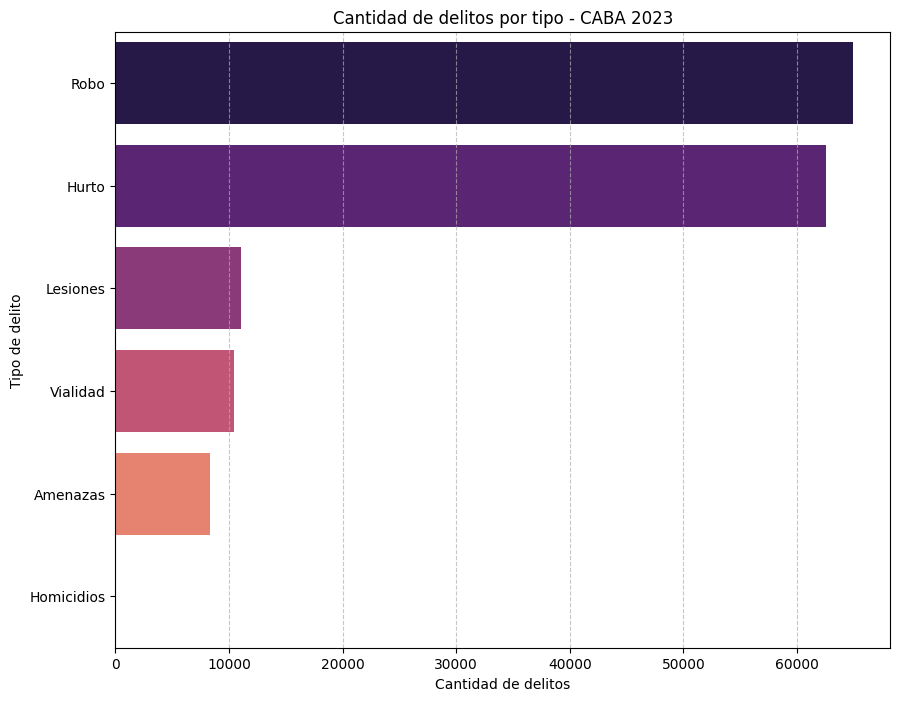

In [43]:
# Agrupamos por tipo de delito y contamos
delitos_por_tipo = df['tipo'].value_counts()

# Graficamos
plt.figure(figsize=(10,8))
sns.barplot(x=delitos_por_tipo.values, y=delitos_por_tipo.index, palette="magma")

plt.title('Cantidad de delitos por tipo - CABA 2023')
plt.xlabel('Cantidad de delitos')
plt.ylabel('Tipo de delito')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Es necesario distinguir la diferencia entre hurto y robo:


*   Se define al hurto como sustraer algo ajeno sin violencia/intimidación hacia la persona. Es decir, no hay fuerza física.
*   En cambio, el robo utiliza la violencia física y la intimidación. Por ende, es un delito más peligroso.



### **Análisis del Dataset**

---



In [44]:
# Importar librerías necesarias
import pandas as pd

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cargar el archivo Excel
ruta = '/content/drive/MyDrive/Data Science I: Fundamentos para la ciencia de datos/delitos_2023.xlsx'
df = pd.read_excel(ruta)

# Ver primeras filas
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2023,enero,LUN,2023-01-02,19,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,-58445747,-34559570,1
1,2,2023,enero,MIE,2023-01-11,11,Vialidad,Muertes por siniestros viales,NO,NO,VILLA LUGANO,8,-58476557,-34673096,1
2,3,2023,enero,VIE,2023-01-13,4,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,-58485670,-34544011,1
3,4,2023,enero,VIE,2023-01-13,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58451874,-34636364,1
4,5,2023,enero,VIE,2023-01-13,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58451874,-34636364,1


In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157461 entries, 0 to 157460
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id-mapa   157461 non-null  int64         
 1   anio      157461 non-null  int64         
 2   mes       157461 non-null  object        
 3   dia       157461 non-null  object        
 4   fecha     157461 non-null  datetime64[ns]
 5   franja    157461 non-null  int64         
 6   tipo      157461 non-null  object        
 7   subtipo   157461 non-null  object        
 8   uso_arma  157461 non-null  object        
 9   uso_moto  157461 non-null  object        
 10  barrio    156779 non-null  object        
 11  comuna    156795 non-null  object        
 12  latitud   154642 non-null  object        
 13  longitud  154642 non-null  object        
 14  cantidad  157461 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(10)
memory usage: 18.0+ MB


In [46]:
# Copiamos el dataframe
df_pca = df.copy()

# Convertimos mes y dia a numérico (si están en texto)
df_pca['mes'] = pd.to_numeric(df_pca['mes'], errors='coerce')
df_pca['dia'] = pd.to_numeric(df_pca['dia'], errors='coerce')

# Extraemos día de la semana de la fecha
df_pca['dia_semana'] = df_pca['fecha'].dt.dayofweek  # lunes=0, domingo=6

# Convertimos lat/lon a float (algunos vienen como string)
df_pca['latitud'] = pd.to_numeric(df_pca['latitud'], errors='coerce')
df_pca['longitud'] = pd.to_numeric(df_pca['longitud'], errors='coerce')

# Seleccionamos columnas útiles
columnas_utiles = [
    'anio', 'mes', 'dia', 'dia_semana', 'franja', 'tipo', 'subtipo',
    'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud', 'cantidad'
]

df_pca = df_pca[columnas_utiles].dropna()


In [47]:
# Codificamos las categóricas
df_encoded = pd.get_dummies(df_pca, drop_first=True)
df_encoded.head()


,anio,mes,dia,dia_semana,franja,latitud,longitud,cantidad


In [48]:
# Copia del DataFrame original
df_copy = df.copy()

# Convertir latitud y longitud a números
df_copy['latitud'] = pd.to_numeric(df_copy['latitud'], errors='coerce')
df_copy['longitud'] = pd.to_numeric(df_copy['longitud'], errors='coerce')

# Eliminar filas con NaNs en columnas clave
df_copy = df_copy.dropna(subset=['barrio', 'comuna', 'latitud', 'longitud'])

# Selección de variables relevantes
df_selected = df_copy[['anio', 'franja', 'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud', 'cantidad']]

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# Confirmar que hay datos
print(df_encoded.shape)
df_encoded.head()


(154250, 97)


,anio,franja,latitud,longitud,cantidad,uso_arma_SI,uso_moto_SI,barrio_AGRONOMIA,barrio_ALMAGRO,barrio_BALVANERA,...,comuna_CC-06,comuna_CC-07,comuna_CC-08,comuna_CC-09,comuna_CC-10,comuna_CC-11,comuna_CC-12,comuna_CC-13,comuna_CC-14,comuna_CC-15
0,2023,19,-58445747.0,-34559570.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023,11,-58476557.0,-34673096.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023,4,-58485670.0,-34544011.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,6,-58451874.0,-34636364.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023,6,-58451874.0,-34636364.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(df_encoded)

# Confirmamos que está hecho
print("Estandarización completada. Dimensiones:", X_scaled.shape)


Estandarización completada. Dimensiones: (154250, 97)


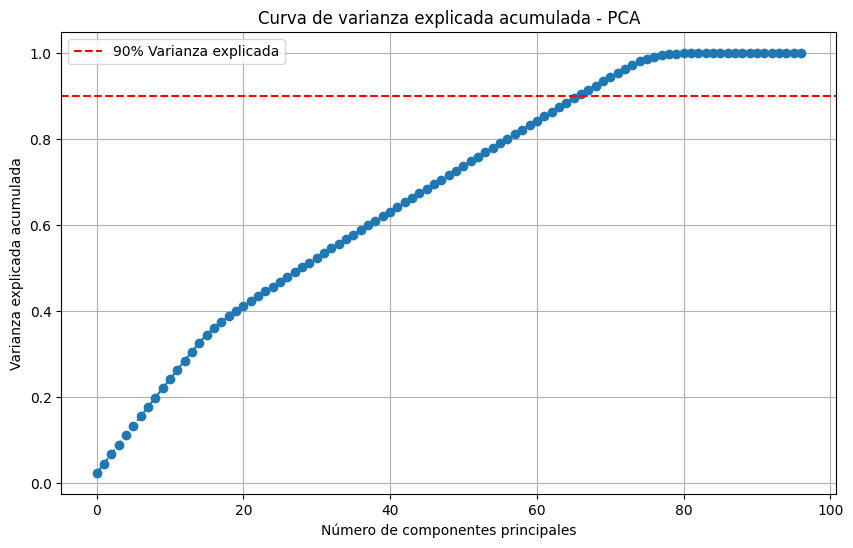

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Crear el modelo PCA
pca = PCA()

# Ajustar PCA a los datos estandarizados
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada acumulada
varianza_explicada = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de varianza explicada acumulada
plt.figure(figsize=(10,6))
plt.plot(varianza_explicada, marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Curva de varianza explicada acumulada - PCA')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Varianza explicada')
plt.legend()
plt.show()


In [51]:
# Seleccionamos los primeros 65 componentes que explican ~90% de la varianza
pca_65 = PCA(n_components=65)

# Ajustamos y transformamos los datos escalados
X_reduced = pca_65.fit_transform(X_scaled)

print("Forma de los datos reducidos:", X_reduced.shape)


Forma de los datos reducidos: (154250, 65)


**Modelo de clasificación para predecir el tipo de délito**

In [56]:
# Eliminar puntos usados como separadores de miles
df_clean['latitud'] = df_clean['latitud'].str.replace('.', '', regex=False)

# Reemplazar comas por puntos (decimal)
df_clean['latitud'] = df_clean['latitud'].str.replace(',', '.', regex=False)

# Lo mismo para longitud
df_clean['longitud'] = df_clean['longitud'].str.replace('.', '', regex=False)
df_clean['longitud'] = df_clean['longitud'].str.replace(',', '.', regex=False)

# Convertir a float
df_clean['latitud'] = df_clean['latitud'].astype(float)
df_clean['longitud'] = df_clean['longitud'].astype(float)



<ipython-input-56-27a9bfb2a94e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['latitud'] = df_clean['latitud'].str.replace('.', '', regex=False)
<ipython-input-56-27a9bfb2a94e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['latitud'] = df_clean['latitud'].str.replace(',', '.', regex=False)
<ipython-input-56-27a9bfb2a94e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [58]:
df_clean = df.dropna(subset=['latitud', 'longitud']).copy()


In [60]:
# Eliminar los puntos que están antes de las comas (separadores de miles)
df_clean.loc[:, 'latitud'] = df_clean['latitud'].str.replace(r'\.(?=\d{3})', '', regex=True)
df_clean.loc[:, 'longitud'] = df_clean['longitud'].str.replace(r'\.(?=\d{3})', '', regex=True)

# Reemplazar coma decimal por punto decimal
df_clean.loc[:, 'latitud'] = df_clean['latitud'].str.replace(',', '.', regex=False)
df_clean.loc[:, 'longitud'] = df_clean['longitud'].str.replace(',', '.', regex=False)

# Ahora sí convertir a float
df_clean.loc[:, 'latitud'] = df_clean['latitud'].astype(float)
df_clean.loc[:, 'longitud'] = df_clean['longitud'].astype(float)



In [61]:
from sklearn.preprocessing import LabelEncoder

# Codificamos la variable objetivo 'tipo'
le = LabelEncoder()
y = le.fit_transform(df_clean['tipo'])

print("Clases encontradas:", le.classes_)
print("Ejemplo de codificación:", list(zip(df_clean['tipo'].head(), y[:5])))


Clases encontradas: ['Amenazas' 'Homicidios' 'Hurto' 'Lesiones' 'Robo' 'Vialidad']
Ejemplo de codificación: [('Vialidad', np.int64(5)), ('Vialidad', np.int64(5)), ('Vialidad', np.int64(5)), ('Vialidad', np.int64(5)), ('Vialidad', np.int64(5))]


In [62]:
# Seleccionamos columnas predictoras
# Tomamos las variables categóricas y numéricas que tengan sentido.

cols_predictoras = ['anio', 'franja', 'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud']

# Subconjunto
X = df_clean[cols_predictoras].copy()

# One-hot encoding para variables categóricas
X_encoded = pd.get_dummies(X, columns=['uso_arma', 'uso_moto', 'barrio', 'comuna'], drop_first=True)

print("Número de variables predictoras luego de encoding:", X_encoded.shape[1])


Número de variables predictoras luego de encoding: 97


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalamos solo las columnas numéricas
num_cols = ['anio', 'franja', 'latitud', 'longitud']
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

print("Datos escalados. Forma final:", X_encoded.shape)


Datos escalados. Forma final: (154642, 97)


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño test:", X_test.shape)


Tamaño entrenamiento: (123713, 97)
Tamaño test: (30929, 97)


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Crear el clasificador
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Entrenar con los datos de entrenamiento
rf.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Reporte completo por clase
print("\nReporte detallado por clase:")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.5947
Precision: 0.5984
Recall: 0.5947
F1-score: 0.5912

Reporte detallado por clase:
              precision    recall  f1-score   support

           0       0.40      0.27      0.33      1644
           1       1.00      0.81      0.90        16
           2       0.60      0.71      0.65     12478
           3       0.45      0.51      0.48      2034
           4       0.66      0.54      0.60     12963
           5       0.47      0.54      0.50      1794

    accuracy                           0.59     30929
   macro avg       0.60      0.56      0.58     30929
weighted avg       0.60      0.59      0.59     30929



**Conclusiones**

En este análisis se desarrolló un modelo de clasificación para predecir el tipo de delito a partir del dataset disponible, utilizando un algoritmo Random Forest y aplicando previamente técnicas de preprocesamiento y reducción dimensional.

Los resultados muestran una exactitud global cercana al 59%, con un desempeño variable entre las diferentes clases de delitos. Las clases más frecuentes presentan métricas de precisión razonables, mientras que las menos representadas presentan mayor dificultad para el modelo.

Esto indica que, aunque el modelo capta patrones generales en los datos, existen limitaciones importantes para predecir con alta certeza el tipo de delito solo con las variables consideradas. La presencia de clases desbalanceadas y la posible complejidad inherente de los datos influyen en este resultado.

Se recomienda para futuros trabajos la incorporación de variables adicionales, como datos temporales más específicos, información socioeconómica o variables geoespaciales detalladas, además de explorar técnicas de balanceo de clases y métodos de selección de características más avanzados.

En conclusión, este análisis aporta una primera aproximación cuantitativa al problema de clasificación de delitos, y sienta las bases para futuros desarrollos y optimizaciones en el área.

**Posibilidad de mejora del modelo**

El modelo obtenido con un 59% de precisión refleja el desempeño bajo las condiciones actuales: variables seleccionadas, método de procesamiento y algoritmo utilizado (Random Forest). Sin embargo, este resultado no representa un límite absoluto para el análisis ni implica que no se puedan lograr mejores resultados en futuros estudios.

Existen múltiples caminos para mejorar el rendimiento, tales como la inclusión de nuevas variables o ingeniería de características que aporten información relevante, la optimización de los hiperparámetros del modelo, la exploración de otros algoritmos de clasificación más complejos o especializados, y la aplicación de técnicas para balancear las clases en el conjunto de datos.

Asimismo, la incorporación de datos adicionales o un mejor preprocesamiento puede potenciar la capacidad predictiva del modelo. Por lo tanto, los resultados actuales deben entenderse como un punto de partida sólido sobre el cual se pueden implementar mejoras que aumenten la precisión y utilidad del análisis.